In [1]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn.utils import inferences
from astronn.utils.metrics import *
from astronn import models

import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load stars datasets

In [2]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
df_ds = deltascuti()
df_delta_scuti = df_ds.load(
    "../../astronn/data/deltascuti/preprocessed/*", batch_size=1
)

# Read csv with other phisical paramters (L, Teff, ..)
csv_delta_scuti = pd.read_csv("../data/deltascuti/binaries_obs.csv")
print(csv_delta_scuti)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv  \
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360   
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470   
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630   
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850   
4   CID100866999

In [3]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)

# Read csv with other phisical paramters (L, Teff, ..)
csv_bedding = pd.io.parsers.read_csv("../data/bedding/bedding_teff_logg_rad.csv", sep=",")
csv_bedding

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


,HD,Name,TIC,V,Teff,L,e.L.,rho,e.rho.,Dnu,...,F0,logg,Teff_mast,e_logg,e_Teff_mast,stellar_radius,e_stellar_radius,L_mast,dnu_muhz,ID
0,2280.0,NaN,281499618,9.13,7510.0,5.52,0.26,0.49,0.06,7.17,...,19.5741,4.39426,7575.00,0.079169,138.757,1.39528,0.042407,5.774924,82.986111,TESS2018234235059-S0002-0000000281499618-0121-...
1,3622.0,NaN,43363194,7.77,7930.0,7.86,0.35,0.45,0.06,6.89,...,17.9829,4.33815,7779.00,0.080995,127.816,1.52225,0.043553,7.644720,79.745370,TESS2018263035959-S0003-0000000043363194-0123-...
2,10779.0,NaN,229139161,8.78,7730.0,8.13,0.36,0.39,0.05,6.80,...,17.8840,4.31312,7862.00,0.079127,143.816,1.57905,0.044208,8.582641,78.703704,TESS2018234235059-S0002-0000000229139161-0121-...
3,10961.0,NaN,231014033,9.39,7430.0,NaN,NaN,NaN,NaN,7.30,...,19.7100,4.30846,7600.00,0.080017,137.430,1.54452,0.052922,7.170244,84.490741,TESS2018263035959-S0003-0000000231014033-0123-...
4,17341.0,NaN,122615966,9.32,7810.0,10.05,0.50,0.32,0.05,5.90,...,16.1070,4.24043,7850.00,0.078290,131.083,1.71688,0.046400,10.084488,68.287037,TESS2018263035959-S0003-0000000122615966-0123-...
5,17693.0,NaN,122686610,7.80,7880.0,10.21,0.44,0.33,0.04,6.41,...,16.7301,4.24711,7940.00,0.074653,132.040,1.72004,0.047045,10.593836,74.189815,TESS2018263035959-S0003-0000000122686610-0123-...
6,20203.0,NaN,274038922,8.85,7970.0,8.06,0.38,0.45,0.05,7.20,...,19.8720,4.39860,8144.00,0.073741,167.493,1.47477,0.046296,8.619781,83.333333,TESS2018292075959-S0004-0000000274038922-0124-...
7,20232.0,NaN,159895674,6.88,8060.0,8.64,0.36,0.44,0.05,6.86,...,18.1104,4.33075,7963.00,0.072418,128.366,1.56787,0.043286,8.904756,79.398148,TESS2018263035959-S0003-0000000159895674-0123-...
8,24572.0,NaN,242944780,9.45,7410.0,7.25,0.36,0.35,0.05,7.20,...,18.5760,4.32415,7928.00,0.087546,473.676,1.57199,0.052960,8.795318,83.333333,TESS2018319095959-S0005-0000000242944780-0125-...
9,24975.0,NaN,44645679,7.24,7790.0,9.20,0.39,0.35,0.04,6.23,...,16.0734,4.23611,7693.00,0.077129,119.353,1.69752,0.047540,9.093042,72.106481,TESS2018319095959-S0005-0000000044645679-0125-...


### Load pretrainned NN model

In [4]:
sepconv_mod = tf.keras.models.load_model(
    "/home/roberto/Projects/best_train/sepconvnn_tmp_dos_200/"
)
sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 351, 10)           1010      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 342, 10)           1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 68, 10)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 10)            40        
_________________________________________________________________
flatten (Flatten)            (None, 680)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               68100     
Total params: 70,160
Trainable params: 70,140
Non-trainable params: 20
___________________________________________________

## Results for 11 Binary DS Stars

In [5]:
inf = inferences()
df_results_delta_scuti = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_delta_scuti,
    take_number=11,
    csv_L=csv_delta_scuti,
    debug=False,
)
df_results_delta_scuti.id = df_results_delta_scuti.id.str.upper()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


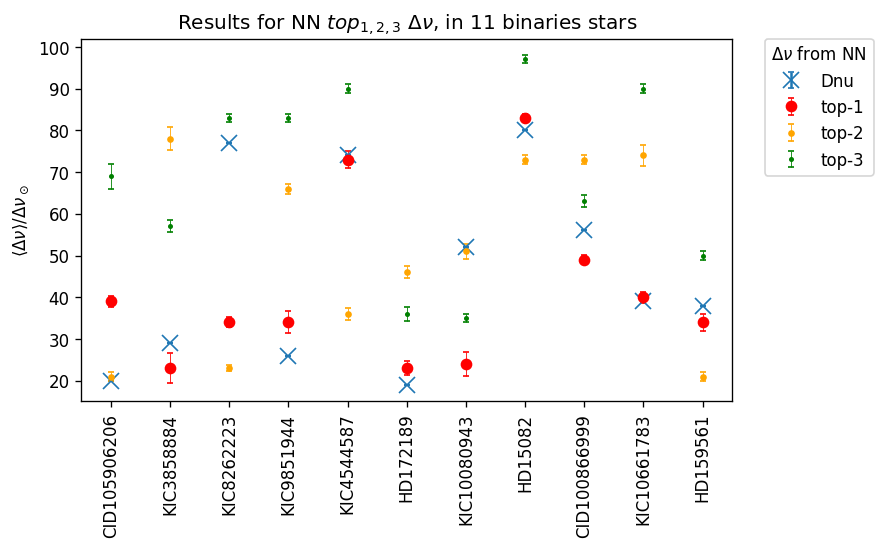

In [6]:
inf.plot_inferences(
    df_results_delta_scuti,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 11 binaries stars",
    plot_size=(7, 4),
)

In [7]:
df_results_delta_scuti_merged = df_results_delta_scuti.merge(csv_delta_scuti , left_on="id", right_on="ID", how="left").drop('ID', 1)
df_results_delta_scuti_merged

,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,e-rho-top3,rho-top4,e-rho-top4,Dnu_muHz,L,Teff,L.Ltot,parallax,mv,rho-gh17
0,CID105906206,20,39,1.229034,21,1.178451,69,2.962202,52,1.141167,...,0.129821,0.2336,0.073637,20,9.396579,6750,0.940,0.9901,12.2620,0.02986
1,KIC3858884,29,23,3.613644,78,2.693781,57,1.409748,39,1.314869,...,0.088501,0.130646,0.041429,29,21.520774,6606,0.470,1.7800,9.3360,0.06570
2,KIC8262223,77,34,1.161095,23,0.757434,83,1.005299,47,1.311323,...,0.188156,0.190451,0.060151,77,5.139949,9128,0.900,0.9832,12.8850,0.42300
3,KIC9851944,26,34,2.605530,66,1.189474,83,1.003733,54,1.387807,...,0.188156,0.252105,0.079417,26,60.062351,6902,0.500,0.4100,11.4770,0.05660
4,KIC4544587,74,73,1.929718,36,1.490254,90,1.030482,21,1.116072,...,0.221437,0.0374136,0.012076,74,6.475306,7750,0.332,1.3600,10.8470,0.41400
5,HD172189,19,23,1.634795,46,1.377856,36,1.718467,89,1.336333,...,0.035312,0.691694,0.216514,19,29.942319,7750,0.702,2.2700,8.8850,0.02830
6,KIC10080943,52,24,2.963901,51,1.824679,35,0.926366,70,1.046125,...,0.033382,0.425838,0.133625,52,7.085301,7480,0.500,1.0600,11.7350,0.20500
7,HD15082,80,83,1.011470,73,1.015208,97,0.954947,46,1.144795,...,0.257471,0.182355,0.057618,80,6.140000,0,0.000,0.0000,0.0000,0.50700
8,CID100866999,56,49,1.044763,73,1.029168,63,1.455164,93,0.980278,...,0.108163,0.755931,0.236542,56,3.865000,7300,NaN,0.5654,15.0970,0.26000
9,KIC10661783,39,40,1.297765,74,2.518126,90,1.087349,58,1.154284,...,0.221437,0.291253,0.091640,39,29.304625,7764,0.937,1.9400,9.5630,0.12550


## Multiples of top1/top2 when top2 is requiered

In [8]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_delta_scuti_merged["dnu-target"])
            - np.asarray(df_results_delta_scuti_merged["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_delta_scuti_merged["dnu-target"])
            - np.asarray(df_results_delta_scuti_merged["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 0,
    df_results_delta_scuti_merged["top1"],
    df_results_delta_scuti_merged["top2"],
)
# Show multiples
df_results_delta_scuti_merged.loc[select_closest_top == 1, ["id", "top1", "top2"]]

,id,top1,top2
0,CID105906206,39,21
6,KIC10080943,24,51


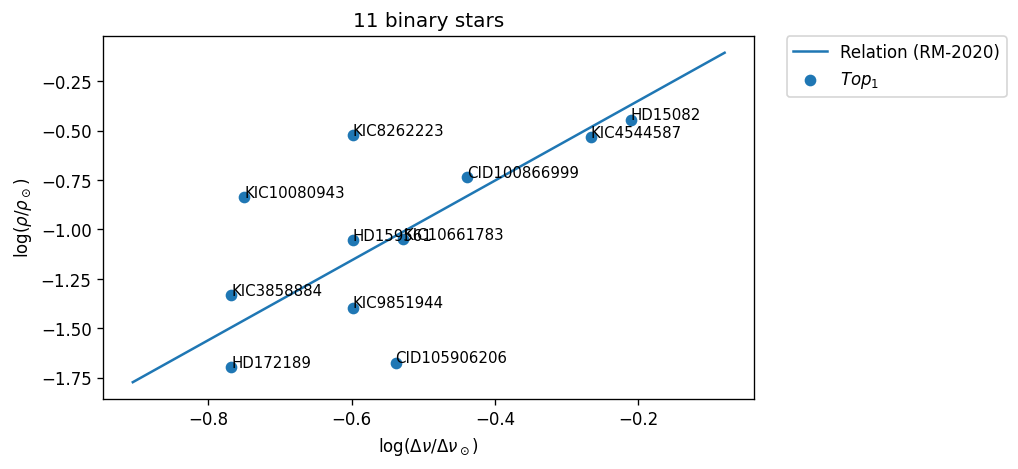

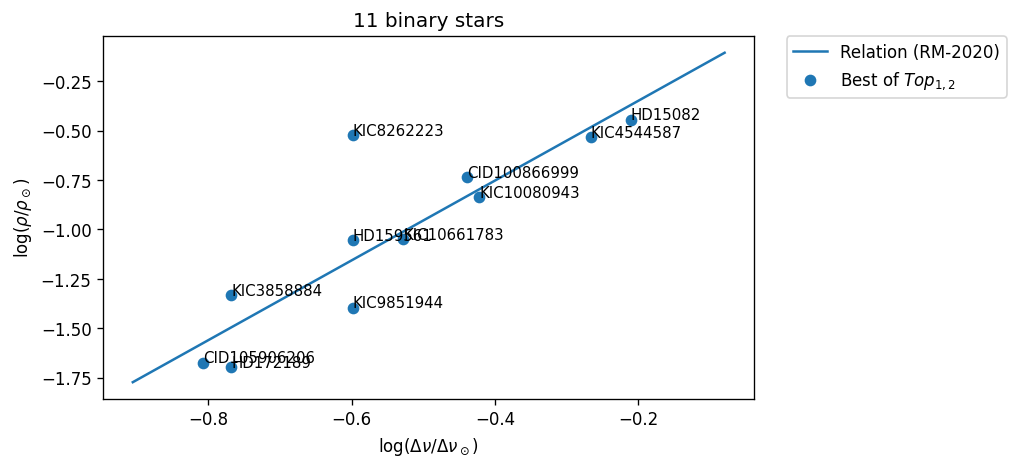

In [9]:
inferences.plot_relation_rodriguez(dnus=df_results_delta_scuti_merged["top1"].values.astype(float), 
                        rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
                        points_ids=df_results_delta_scuti_merged["id"],
                        plot_title="11 binary stars",
                        points_label="$Top_1$")

inferences.plot_relation_rodriguez(dnus=tops.astype(float), 
                        rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
                        points_ids=df_results_delta_scuti_merged["id"],
                        plot_title="11 binary stars",
                        points_label="Best of $Top_{1,2}$")

In [10]:
#df_binary_freqs = pd.read_csv(
#                "../../astronn/data/deltascuti/raw/CID105906206.lis",
#                #"../../astronn/data/bedding/raw/tess2018234235059-s0002-0000000229139161-0121-s_lc_det.dat",
#                sep="\s+",
#                header=None,
#                index_col=False,
#                names=["f", "signif", "a", "V4", "V5", "V6", "V7"],
#            )

## tess2018234235059-s0002-0000000229139161-0121-...	78	40	1.419688	71
#res = echelle(df_binary_freqs[["f"]].values / 0.0864, 20, saveplot = "N")

## Results for 57 Bedding stars


In [11]:
df_results_bedding = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_bedding,
    take_number=57,
    csv_L=csv_bedding,
    debug=False,
)
df_results_bedding

,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,rho-target,e-rho-target,rho-top1,e-rho-top1,rho-top2,e-rho-top2,rho-top3,e-rho-top3,rho-top4,e-rho-top4
0,tess2019058134432-s0009-0000000463556278-0139-...,81,40,1.259818,75,3.822825,22,1.086237,61,1.401296,...,0.571855,0.179152,0.137502,0.043577,0.48952,0.153482,0.0410998,0.013245,0.322487,0.101387
1,tess2018349182459-s0006-0000000124381332-0126-...,86,41,1.758000,85,1.319659,56,1.326959,72,1.044920,...,0.645406,0.202083,0.144534,0.045781,0.630337,0.197384,0.271323,0.085418,0.450773,0.141401
2,tess2019032160000-s0008-0000000332516661-0136-...,68,30,1.599047,67,1.567963,54,1.290611,43,2.647982,...,0.401619,0.126072,0.0769009,0.024550,0.389778,0.122379,0.252105,0.079417,0.15913,0.050351
3,tess2018349182459-s0006-0000000011361473-0126-...,87,44,1.014310,56,1.178350,75,1.373552,90,1.783472,...,0.660656,0.206837,0.166694,0.052719,0.271323,0.085418,0.48952,0.153482,0.707483,0.221437
4,tess2018234235059-s0002-0000000224284988-0121-...,68,67,2.499134,33,1.859342,98,0.776869,44,1.060025,...,0.401619,0.126072,0.389778,0.122379,0.0932276,0.029686,0.840278,0.262845,0.166694,0.052719
5,tess2018319095959-s0005-0000000259675399-0125-...,74,30,4.236293,40,1.163036,61,1.074599,71,1.257952,...,0.476425,0.149399,0.0769009,0.024550,0.137502,0.043577,0.322487,0.101387,0.438216,0.137485
6,tess2019058134432-s0009-0000000287347434-0139-...,81,78,1.100667,37,1.300252,52,1.098796,65,0.956583,...,0.571855,0.179152,0.52988,0.166065,0.117466,0.037296,0.2336,0.073637,0.366633,0.115160
7,tess2018319095959-s0005-0000000000589826-0125-...,75,36,1.190560,74,1.140826,58,1.795380,21,1.505817,...,0.48952,0.153482,0.111142,0.035312,0.476425,0.149399,0.291253,0.091640,0.0374136,0.012076
8,tess2018319095959-s0005-0000000071134596-0125-...,87,42,1.101737,86,1.712817,76,1.244492,65,1.089500,...,0.660656,0.206837,0.151743,0.048039,0.645406,0.202083,0.502794,0.157621,0.366633,0.115160
9,tess2018349182459-s0006-0000000037498433-0126-...,82,30,2.756633,42,2.012310,74,1.033727,91,1.025502,...,0.586206,0.183626,0.0769009,0.024550,0.151743,0.048039,0.476425,0.149399,0.723452,0.226416


In [12]:
df_results_bedding["TIC"] = df_results_bedding["id"].str.split("-").str[2].astype(int)
df_bedding_att = pd.io.parsers.read_csv("../data/bedding/bedding_teff_logg_rad.csv", sep=",", index_col=0)
df_bedding_att
df_bedding_att = df_bedding_att.head(57)
df_bedding_att["TIC"] = df_bedding_att["TIC"].astype(int)


df_results_bedding_merged = df_results_bedding.merge(df_bedding_att, left_on="TIC", right_on="TIC", how="left")
df_results_bedding_merged

,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,F0,logg,Teff_mast,e_logg,e_Teff_mast,stellar_radius,e_stellar_radius,L_mast,dnu_muhz,ID
0,tess2019058134432-s0009-0000000463556278-0139-...,81,40,1.259818,75,3.822825,22,1.086237,61,1.401296,...,19.0242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.250000,TESS2019058134432-S0009-0000000463556278-0139-...
1,tess2018349182459-s0006-0000000124381332-0126-...,86,41,1.758000,85,1.319659,56,1.326959,72,1.044920,...,19.4445,4.37176,8261.00,0.075356,133.174,1.53781,0.049719,9.922775,86.226852,TESS2018349182459-S0006-0000000124381332-0126-...
2,tess2019032160000-s0008-0000000332516661-0136-...,68,30,1.599047,67,1.567963,54,1.290611,43,2.647982,...,15.6350,4.23157,7600.00,0.078551,135.712,1.68652,0.056480,8.549344,68.287037,TESS2019032160000-S0008-0000000332516661-0136-...
3,tess2018349182459-s0006-0000000011361473-0126-...,87,44,1.014310,56,1.178350,75,1.373552,90,1.783472,...,20.0075,4.47037,9692.00,0.085830,732.909,1.51486,0.065254,18.242876,87.384259,TESS2018349182459-S0006-0000000011361473-0126-...
4,tess2018234235059-s0002-0000000224284988-0121-...,68,67,2.499134,33,1.859342,98,0.776869,44,1.060025,...,15.8924,4.21199,7814.40,0.083408,141.880,1.76928,0.054540,10.516456,68.634259,TESS2018234235059-S0002-0000000224284988-0121-...
5,tess2018319095959-s0005-0000000259675399-0125-...,74,30,4.236293,40,1.163036,61,1.074599,71,1.257952,...,17.6275,4.26810,7686.00,0.078842,134.351,1.63162,0.048987,8.370136,74.189815,TESS2018319095959-S0005-0000000259675399-0125-...
6,tess2019058134432-s0009-0000000287347434-0139-...,81,78,1.100667,37,1.300252,52,1.098796,65,0.956583,...,18.2595,4.35714,7949.00,0.074342,126.879,1.51698,0.043254,8.277647,81.597222,TESS2019058134432-S0009-0000000287347434-0139-...
7,tess2018319095959-s0005-0000000000589826-0125-...,75,36,1.190560,74,1.140826,58,1.795380,21,1.505817,...,18.6472,4.32735,7943.00,0.073937,123.979,1.56992,0.040683,8.838681,75.462963,TESS2018319095959-S0005-0000000000589826-0125-...
8,tess2018319095959-s0005-0000000071134596-0125-...,87,42,1.101737,86,1.712817,76,1.244492,65,1.089500,...,20.1852,4.40749,8453.00,0.071896,133.345,1.50035,0.045422,10.354341,87.500000,TESS2018319095959-S0005-0000000071134596-0125-...
9,tess2018349182459-s0006-0000000037498433-0126-...,82,30,2.756633,42,2.012310,74,1.033727,91,1.025502,...,18.2470,4.33734,8114.00,0.078119,123.042,1.57614,0.052588,9.701160,82.175926,TESS2018349182459-S0006-0000000037498433-0126-...


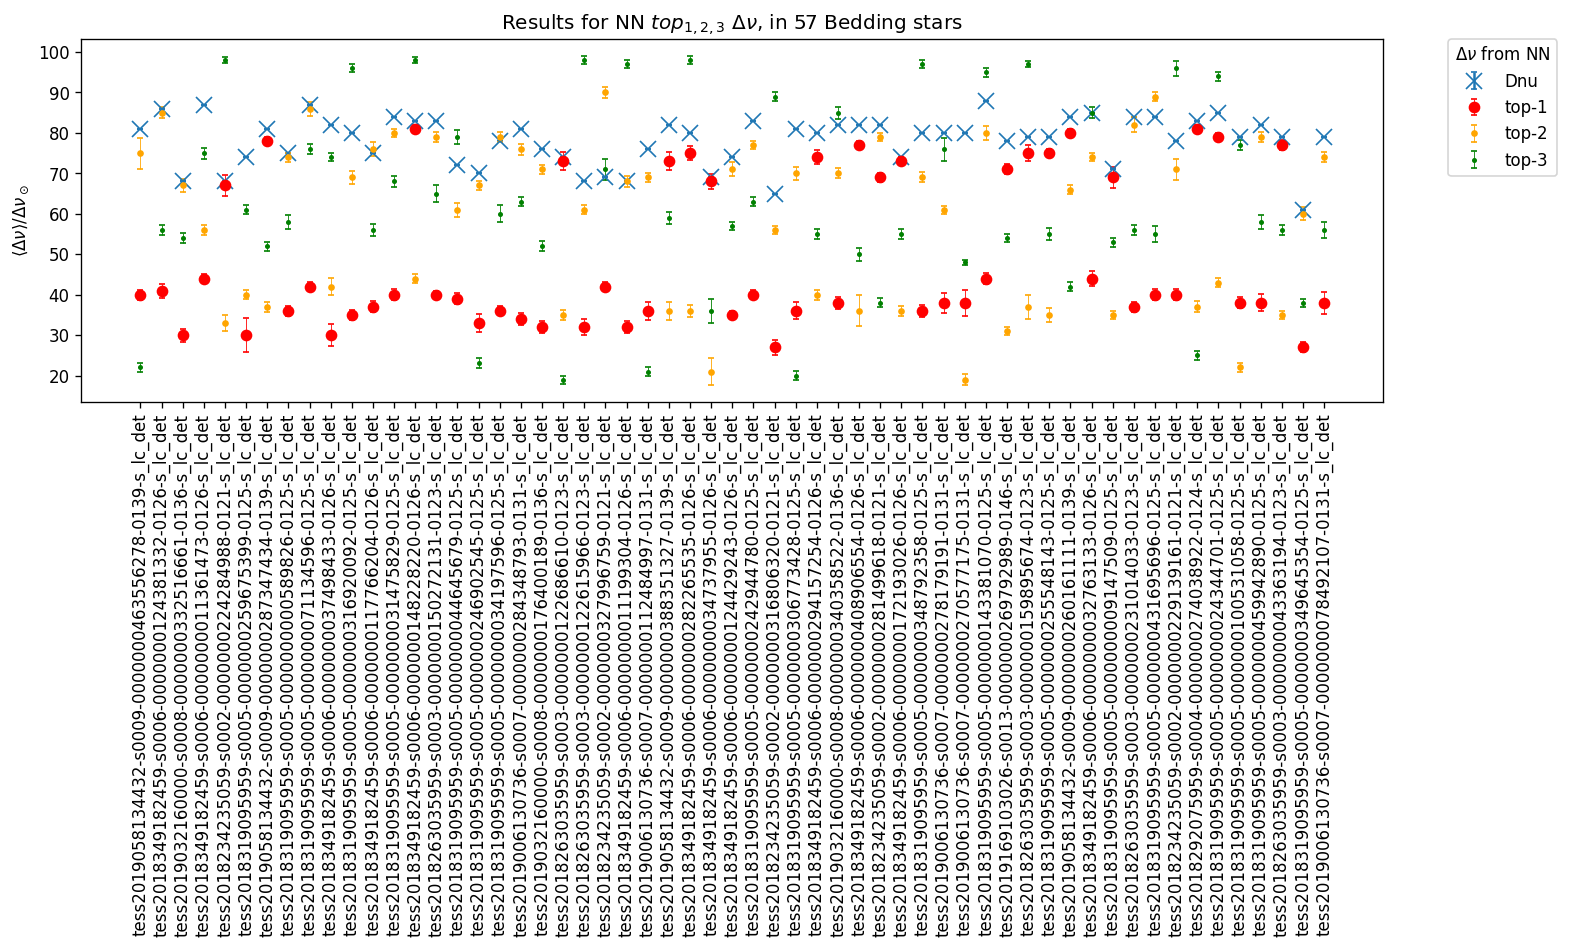

In [13]:
inf.plot_inferences(
    df_results_bedding_merged,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 57 Bedding stars",
    plot_size=(14, 4),
)

In [14]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 0, df_results_bedding["top1"], df_results_bedding["top2"]
)

#plt.hist(
#    df_results_bedding.loc[select_closest_top == 1, ["top1"]].values
#    / df_results_bedding.loc[select_closest_top == 1, ["top2"]].values,
#    bins=100,
#)
#plt.show()

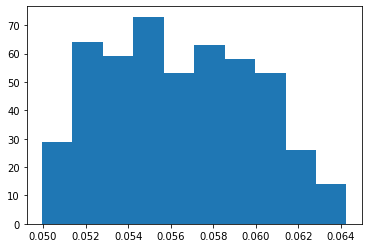

In [15]:
models = pd.read_csv("/home/roberto/Downloads/evolutionTracks_line_rho_roche/models_params.csv", 
                        header=None, 
                        names=["Teff", "Dnu", "L_must", "rho_roche"])

def get_avg_rho_roche(teff, l, e_teff=50, e_l=5):
    """
    """
    id_teff = models["Teff"].between(teff-e_teff, teff+e_teff, inclusive=True)
    id_l = models["L_must"].between(l-e_l, l+e_l, inclusive=True)
    return models[(id_teff & id_l)]["rho_roche"]

plt.hist(get_avg_rho_roche(8320.860521, 66))
plt.show()

In [16]:
df_results_bedding_merged["avg_rho_roche"] = df_results_bedding_merged[["Teff", "L_mast"]].apply(lambda x: np.average(get_avg_rho_roche(x["Teff"], x["L_mast"])), axis=1)
df_results_bedding_merged.head()

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,logg,Teff_mast,e_logg,e_Teff_mast,stellar_radius,e_stellar_radius,L_mast,dnu_muhz,ID,avg_rho_roche
0,tess2019058134432-s0009-0000000463556278-0139-...,81,40,1.259818,75,3.822825,22,1.086237,61,1.401296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.250000,TESS2019058134432-S0009-0000000463556278-0139-...,NaN
1,tess2018349182459-s0006-0000000124381332-0126-...,86,41,1.758000,85,1.319659,56,1.326959,72,1.044920,...,4.37176,8261.0,0.075356,133.174,1.53781,0.049719,9.922775,86.226852,TESS2018349182459-S0006-0000000124381332-0126-...,0.462716
2,tess2019032160000-s0008-0000000332516661-0136-...,68,30,1.599047,67,1.567963,54,1.290611,43,2.647982,...,4.23157,7600.0,0.078551,135.712,1.68652,0.056480,8.549344,68.287037,TESS2019032160000-S0008-0000000332516661-0136-...,0.378346
3,tess2018349182459-s0006-0000000011361473-0126-...,87,44,1.014310,56,1.178350,75,1.373552,90,1.783472,...,4.47037,9692.0,0.085830,732.909,1.51486,0.065254,18.242876,87.384259,TESS2018349182459-S0006-0000000011361473-0126-...,0.395793
4,tess2018234235059-s0002-0000000224284988-0121-...,68,67,2.499134,33,1.859342,98,0.776869,44,1.060025,...,4.21199,7814.4,0.083408,141.880,1.76928,0.054540,10.516456,68.634259,TESS2018234235059-S0002-0000000224284988-0121-...,0.393391


/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


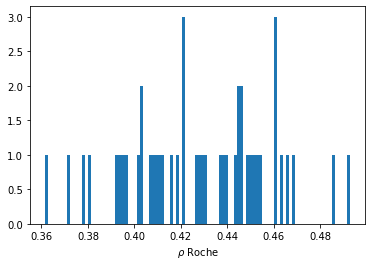

In [17]:
plt.hist(df_results_bedding_merged["avg_rho_roche"], bins=100)
plt.xlabel("$\\rho$ Roche")
plt.show()

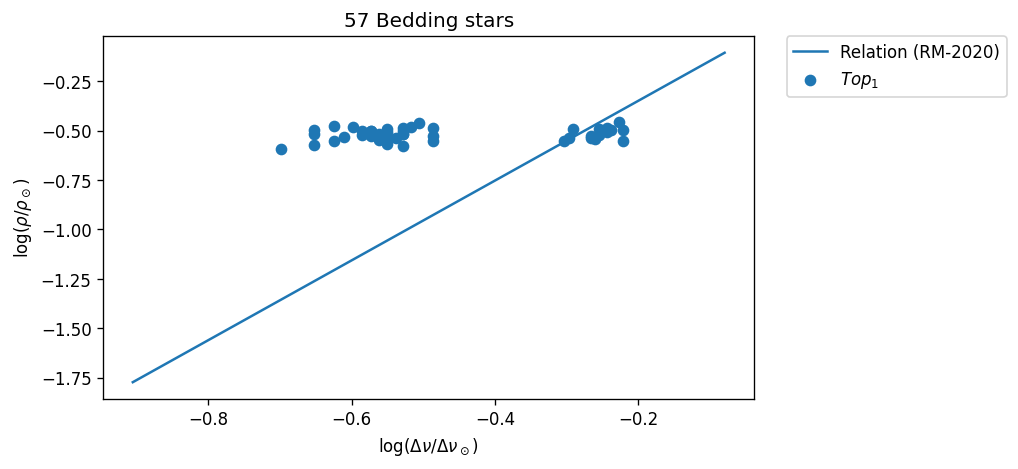

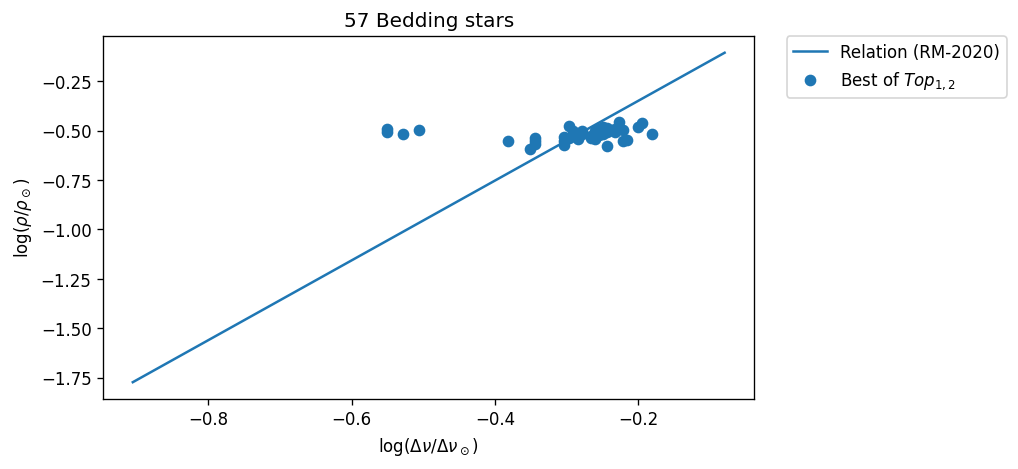

In [18]:
inferences.plot_relation_rodriguez(dnus=df_results_bedding_merged["top1"].values.astype(float), 
                        rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
                        points_ids=None,
                        plot_title="57 Bedding stars",
                        points_label="$Top_1$")

inferences.plot_relation_rodriguez(dnus=tops.astype(float), 
                        rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
                        points_ids=None,
                        plot_title="57 Bedding stars",
                        points_label="Best of $Top_{1,2}$")